## Problème
1) Soit E un ensemble de `n` points dans le plan,
$$
    E= \lbrace (x_i, y_i); i=1,\ldots,n\rbrace
$$
On cherche à trouver la droite la plus proche expliquant ces points en utilisant la méthode de moindre carré. C'est-à-dire si on suppose `(D)` cette droite avec l'équation de 
$$
    (D): \hat{y} = a x + b
$$
On aimera que les $y_i$ et des $\hat{y}_i$ soient les plus proches possibles, c'est-à-dire, on choisit $a$ et $b$ en realisant le minimum suivant
$$
    \min ||(Y - \hat{Y})||^2_{2} ~~~ (1)
$$
 avec 
$$
    Y = (y_1, y_2, \ldots y_n) \text{ et } \hat{Y} = (\hat{y}_1, \hat{y}_2, \ldots \hat{y}_n)
$$
et $||~~~||_2$ est la distance euclidienne d'ordre 2

L'objectif principal est de trouver la droite `(D)` (c'est-à-dire trouver `a` et `b`) vérifiant l'équation (1)

Le problème peut s'écrire sous forme matricielle
$$
    \hat{Y} = \left( \begin{array}{cc} 
        1 & x_1 \\
        1 & x_2 \\
        \ldots  & \\
        1 & x_n
    \end{array} \right) 
    \left( 
    \begin{array}{c} 
        b \\ 
        a 
    \end{array} 
    \right) = X \beta
$$
en posant $$\beta = \left( 
    \begin{array}{c} 
        b \\ 
        a 
    \end{array} 
    \right) $$ et $X$ la matrice avant.

Le problème revient donc à trouver un $\beta$ qui vérifie (1), c'est-à-dire celui qui réalise le minimum de 
$$
    ||(Y - X \beta)||^2_{2} ~~~ (1)
$$
1) En faisant la remarque que $||(Y - X \beta)||^2_{2}$ est derivable par rapport à chaque élément de $\beta$ (ie `a` et `b`) , trouver alors la solution du problème.

2) Coder ce problème dans le plan

3) Coder ce problème pour un espace de dimension supérieure

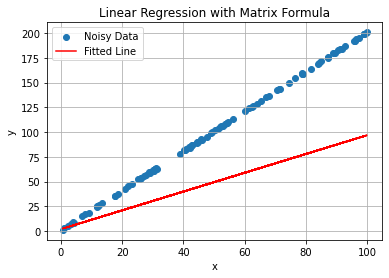

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def anal(x, y):

    # Construct the design matrix X
    X = np.ones((len(x), 1))  # Create first column of 1s
    x = x[:, np.newaxis]      # Create second column with x values
    X = np.hstack((X, x))    # Combine columns

    # Calculate the coefficients using the matrix β=(XTX)−1XTY
    Y = y[:, np.newaxis]  # Create y vector
    beta = np.linalg.inv(X.T @ X) @ (X.T @ Y)  # Matrix formula for beta

    return beta

# Generate Test Data (Example with Noise)
a_true = 2  # True slope
b_true = 1  # True y-intercept

x = np.random.rand(100) * 100
y_true = a_true * x + b_true
noise = np.random.normal(0, 0.5, 100)
y_noisy = y_true + noise

# Test the Function
beta_estimated = anal(x, y_noisy)

# Plot the data and the fitted line
plt.scatter(x, y_noisy, label='Noisy Data')  # Scatter plot for noisy data
plt.plot(x, beta_estimated[0] * x + beta_estimated[1], color='red', label='Fitted Line')  # Plot the fitted line
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with Matrix Formula')
plt.legend()
plt.grid(True)
plt.show()
